> Last Updated 11/8/2024

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)

# Data quality issues (e.g., inconsistent data, outliers)

For handling data quality issues, we often need to work with domain experts who know the data and this process can be very time consuming, accounting for 80% to 90% of our time. Sometimes, we may not be able to clean all inconsistent data.

Below is a simple demo.

In [2]:
# a list of Championship teams
d = {'prices': [100, 101, 99, 95, 100, 101, 99, 95, 110, 130, 120, 110, 105, 97, 115, 
                110, 130, 120, 110, 105, 97, 115, 150000, 160000]}
df = pd.DataFrame(data=d)
df

,prices
0,100
1,101
2,99
3,95
4,100
5,101
6,99
7,95
8,110
9,130


In [3]:
df.sort_values('prices', ascending=False).head(10)

,prices
23,160000
22,150000
16,130
9,130
17,120
10,120
14,115
21,115
18,110
8,110


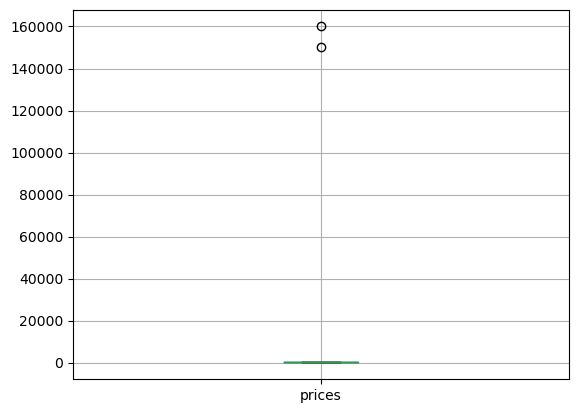

In [4]:
df.boxplot('prices')
plt.show();

In the above situation, a couple of data points appear to be too extreme (or outliers). There are a number of techniques to handle outliers, but a simple approach is removing the row or rows containing such values.

In [5]:
df = df[df['prices'] < 150]
df

,prices
0,100
1,101
2,99
3,95
4,100
5,101
6,99
7,95
8,110
9,130


# Data transformation

## Create a new column ('age')

In [6]:
import pandas as pd

d = {
    'Id': [1, 2, 3],
    'dob': pd.to_datetime(['13/01/1978', '03/08/1957', '22/12/1977'], dayfirst=True)
}
df = pd.DataFrame(d)
df

,Id,dob
0,1,1978-01-13
1,2,1957-08-03
2,3,1977-12-22


In [7]:
from datetime import datetime

# Calculate age
current_date = datetime.now()
df['age'] = (current_date - df['dob']).dt.days // 365

df

,Id,dob,age
0,1,1978-01-13,46
1,2,1957-08-03,67
2,3,1977-12-22,46


## Create a new binary column

In [8]:
d = {'prices': [100, 101, 99, 95, 100, 101, 99, 95, 110, 130, 120, 110, 105, 97, 115, 
                110, 130, 120, 110, 105, 97, 115, 150000, 160000]}
df = pd.DataFrame(data=d)
df

,prices
0,100
1,101
2,99
3,95
4,100
5,101
6,99
7,95
8,110
9,130


In [9]:
# I want a new column with a condition (0 for normal values, 1 for extremely large numnbers)
df['bignumber'] = 0
df.loc[df['prices'] > 10000, 'bignumber'] = 1
df

,prices,bignumber
0,100,0
1,101,0
2,99,0
3,95,0
4,100,0
5,101,0
6,99,0
7,95,0
8,110,0
9,130,0
